In [1]:
#importing the commands
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

import warnings

# to get rid of warnings during models
warnings.filterwarnings("ignore", category=UserWarning, message=".*threadpoolctl.*")

In [2]:
with zipfile.ZipFile('grayscale_img.csv.zip','r') as zip_ref:
    zip_ref.extractall()

Here we are defining functions that we will be using on the data in order to reduce the size of the orinigal images so that we can reduce computational power needed. Since we are reducing the size we want to make up for it my calculating the average of the images and recreating the images using the averages.

The following code is to show us the comparison of the first 3 images between resized(avg) image to the original. Also will be a good indication for us to see if the avg pixel is a good basis to base the kmeans and make conclusions on or if its too drastically different to acknowledge that and consider it for our final conclusions.


# Function to load images from a directory
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):  #JPG format
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
            images.append(image)
    return images

# Function to calculate average pixel values
def calculate_average_pixels(images):
    return [np.mean(image) for image in images]

# Function to resize images using average pixel values
def resize_images(images, new_size=(30, 30)):
    resized_images = []
    for image in images:
        avg_pixel = np.mean(image)
        resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
        resized_images.append(resized_image)
    return resized_images

# Load images from the dataset
dataset_directory = 'Final_project_data/512x512-dataset-melanoma'  # Path to your dataset directory
images = load_images(dataset_directory)

# Calculate average pixel values
average_pixels = calculate_average_pixels(images)

# Resize images using average pixel values
resized_images = resize_images(images)

# Plot original and resized images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[1, i].imshow(resized_images[i], cmap='gray')
    axes[1, i].set_title('Resized')
    axes[0, i].axis('off')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [3]:
# read the csv that has all the changes applied already
df = pd.read_csv("grayscale_img.csv")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2fd78b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2fd78b0>
Traceback 

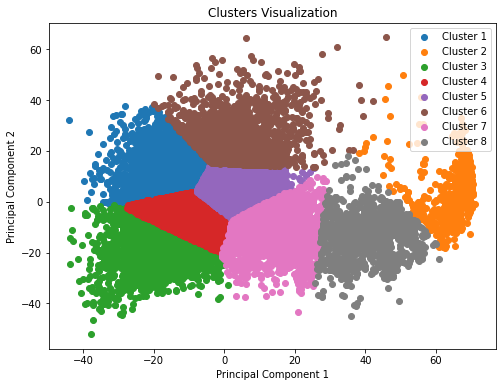

In [4]:

def vis_clust(df, n_clusters=8):
    # Convert DataFrame to numpy array
    data = df.values
    
    # Flatten the data
    flattened_data = data.reshape(data.shape[0], -1)
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(flattened_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data_scaled)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_reduced)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        plt.scatter(data_reduced[cluster_labels == cluster, 0], 
                    data_reduced[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}')
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Filter numeric columns bc some vectors contain string
numeric_df = df.select_dtypes(include=np.number)

# Call vis_clust only num values, because cant run with strings
vis_clust(numeric_df)

now that we have the images preprocessed, we know there should be 8 different clusters since the images contain 8 different skin conditions, but we want to see how it will cluster them using k means. Also since we are doing a unsupervised portion we will be using a elbow method to decide the number of clusers, and compare to the actual amount we know is true.

The kmeans at 8 clusters does a good job at clustering. Our only concern would be the top right section between cluster 4 and 5 but that is a given due to outliers.


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2d4ef70>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2d4edc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f9912ca0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f9912ca0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f9912ca0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2e3ac10>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f9912ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2da8040>
Traceback 

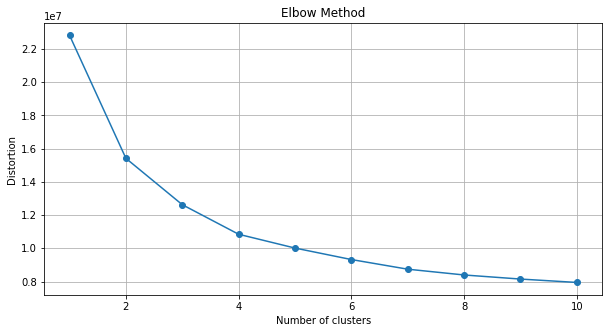

In [5]:
def elbow_method(df, max_clusters=10):
    distortions = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(df)
        # Sum of squared distances to closest centroid
        distortions.append(kmeans.inertia_)  

    # Plotting the elbow method
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]

# Prepare data
flattened_data = np.array([image.flatten() for image in numeric_data.values])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(flattened_data)

# Run elbow method
elbow_method(data_scaled, max_clusters=10)

We see that based off the elbow graph between 2-4 is ideal for the number of clusters for our kmeans. It makes sense that it would be less than 8 because that would be overfitting, but another reason for this can be that skin lesions may minor differences, that the kmeans overlooked. We will compare how a cluster of 3 looks with respect to cluster of 8

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f036a820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f036a820>
Traceback 

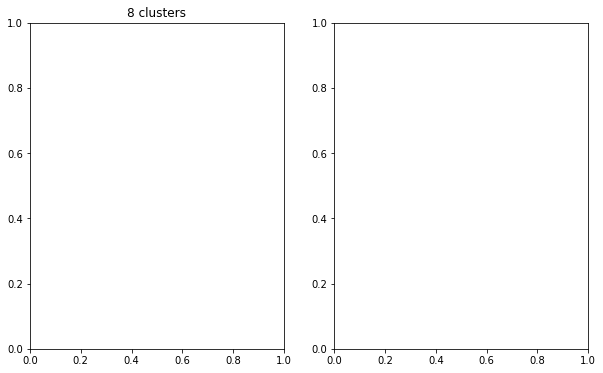

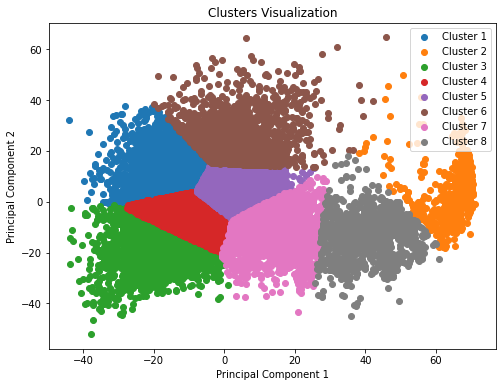

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2d4e9d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2d4e9d0>
Traceback 

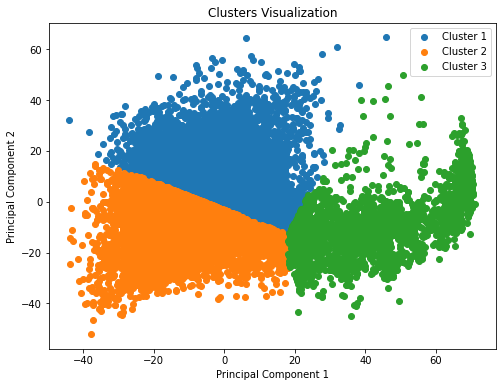

<Figure size 432x288 with 0 Axes>

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot with 8 clusters
axs[0].set_title('8 clusters')
vis_clust(numeric_df, n_clusters=8)

# Plot with 3 clusters
axs[1].set_title('3 clusters')
vis_clust(numeric_df, n_clusters=3)

plt.tight_layout()
plt.show()

Our df's last column contains the truths of each image, we will now be using this column to see how accurate the kmeans is with respect to what we know is true. We will be testing this for clusters=3, and 9. 

In [7]:
# write out all the unique strings in the last column
unique_strings = df.iloc[:, -1].unique()
print(unique_strings)

['NV' 'MEL' 'BKL' 'DF' 'SCC' 'BCC' 'VASC' 'AK']


In [8]:
from sklearn.metrics import accuracy_score
#Extract truths from df last column
true_labels = df.iloc[:, -1]
# kmeans 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_scaled)
labels_3 = kmeans_3.labels_

#kmeans 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
kmeans_8.fit(data_scaled)
labels_8 = kmeans_8.labels_

# Mapping clusters to true labels
cluster_mapping = {
    0: 'NV',
    1: 'MEL',
    2: 'BKL',
    3: 'DF',
    4: 'SCC',
    5: 'BCC',
    6: 'VASC',
    7: 'AK'
}

# Map cluster labels to true labels for 3 clusters
predicted_labels_3 = [cluster_mapping[label] for label in labels_3]

# Map cluster labels to true labels for 8 clusters
predicted_labels_8 = [cluster_mapping[label] for label in labels_8]

# Compare the accuracy of the clustering results
accuracy_3 = accuracy_score(true_labels, predicted_labels_3)
accuracy_8 = accuracy_score(true_labels, predicted_labels_8)
# Print the first few predicted labels for each clustering
print("\nPredicted Labels for 3 clusters:")
print(predicted_labels_3[:10])  # Print the first 10 predicted labels for 3 clusters
print("\nPredicted Labels for 8 clusters:")
print(predicted_labels_8[:10])  # Print the first 10 predicted labels for 8 clusters
print("Accuracy with 3 clusters:", accuracy_3)
print("Accuracy with 8 clusters:", accuracy_8)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2f40a60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3f2f40f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio


Predicted Labels for 3 clusters:
['NV', 'MEL', 'MEL', 'NV', 'MEL', 'MEL', 'MEL', 'MEL', 'BKL', 'NV']

Predicted Labels for 8 clusters:
['AK', 'SCC', 'NV', 'DF', 'DF', 'BCC', 'NV', 'DF', 'VASC', 'AK']
Accuracy with 3 clusters: 0.30500177647941257
Accuracy with 8 clusters: 0.17437132367454897


Due to our low accuracy score in our image predicting models. We looked to the metadata of the images in an attempt to create a predictive model using those statistics of the patients and see if that is better at prediciting the skin lesion. 

Things to know from the following data it consists of 5 columns (image, age_approx, site, lesion id, sex). We needed to clean the data a bit specifically remove any rows without a lesion id. We then got rid of portion of the string in the lesion id, because the data included the lesion id with respect to the image. The reason for this is to be able to use this column as our ground truths for validation. Lastly we convert the sex column from string to numerical values in our case female=0, and male=1. 

In [9]:
# Load the metadata from the CSV file
metadata_df = pd.read_csv("ISIC_2019_Training_Metadata.csv")

# Drop rows where 'lesion_id' is blank or missing
metadata_df.dropna(subset=['lesion_id'], inplace=True)

# Remove characters after the underscore in 'lesion_id' column
metadata_df['lesion_id'] = metadata_df['lesion_id'].apply(lambda x: x.split('_')[0])

# Convert strings in the 'sex' column to numerical values
metadata_df['sex'] = metadata_df['sex'].map({'female': 0, 'male': 1})

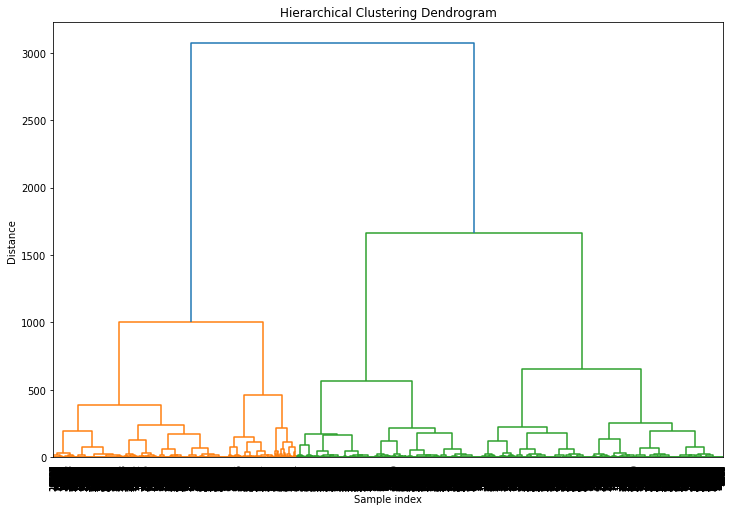

In [10]:
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
metadata_df['anatom_site_general'] = label_encoder.fit_transform(metadata_df['anatom_site_general'])

# Select features for clustering
features = metadata_df[['age_approx', 'anatom_site_general','sex']]
# Impute NaN values with mean
features = features.fillna(features.mean())
# Perform hierarchical clustering
Z = linkage(features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


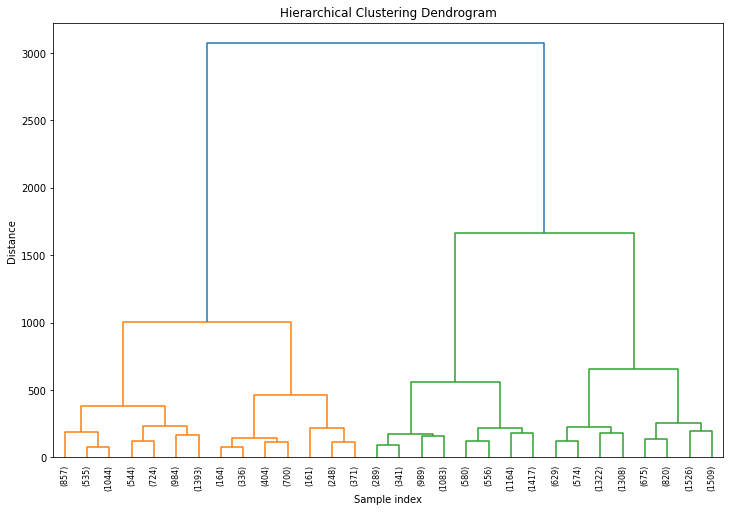

In [11]:
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
metadata_df['anatom_site_general'] = label_encoder.fit_transform(metadata_df['anatom_site_general'])

# Select features for clustering
features = metadata_df[['age_approx', 'anatom_site_general','sex']]
# Impute NaN values with mean
features = features.fillna(features.mean())
# Perform hierarchical clustering
Z = linkage(features, method='ward')

# Obtain cluster labels
# You can adjust the threshold distance 't' to determine the number of clusters
t = 100  # Adjust this threshold as needed
cluster_labels = fcluster(Z, t, criterion='distance')

# Plot dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score
#Remove missing or blank values from metadata
metadata_df = metadata_df.dropna(subset=['lesion_id'])

#Ground Truth
ground_truth_labels = metadata_df['lesion_id'].apply(lambda x: x.split('_')[0])

ari = adjusted_rand_score(ground_truth_labels, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.013857339073960117


gausian mix model 


The next portion we are conducting another type of unsupervised learning, specifically dimensional reduction since we are dealing with high range of images we want to see if we can reduce the dimensionality to a simplified and easier to compute. Here we are doing PCA, T-SNE, and UMAP